In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [2]:
df_owid = pd.read_csv('https://raw.githubusercontent.com/sghsri/covid-19-data/main/owid-covid-latest.csv')
df_pop = pd.read_csv('https://raw.githubusercontent.com/sghsri/covid-19-data/main/population_by_country_2020.csv')
df_hos = pd.read_csv('https://raw.githubusercontent.com/sghsri/covid-19-data/main/covid-hospitalizations.csv')

In [3]:
df_hos

,entity,iso_code,date,indicator,value
0,Algeria,DZA,2020-07-17,Daily ICU occupancy,62.000
1,Algeria,DZA,2020-07-17,Daily ICU occupancy per million,1.390
2,Algeria,DZA,2020-07-18,Daily ICU occupancy,67.000
3,Algeria,DZA,2020-07-18,Daily ICU occupancy per million,1.502
4,Algeria,DZA,2020-07-20,Daily ICU occupancy,64.000
...,...,...,...,...,...
131231,United States,USA,2022-03-31,Daily ICU occupancy per million,5.875
131232,United States,USA,2022-03-31,Daily hospital occupancy,11291.000
131233,United States,USA,2022-03-31,Daily hospital occupancy per million,33.916
131234,United States,USA,2022-03-31,Weekly new hospital admissions,11024.000


In [4]:
def get_dates_values(country='United States'):
    a = df_hos
    a = a[a.indicator=='Daily ICU occupancy']
    a = a[a.entity==country]
    
    dates_str = a.date
    dates = np.array([datetime.strptime(d, '%Y-%m-%d') for d in dates_str])
    ts = np.array([d.timestamp() for d in dates])
    values = a.value
    return dates_str, dates, ts, values

def get_xticks(tss, n_ticks=10):
    ts_all = np.concatenate(tss)
    ticks = np.linspace(ts_all.min(), ts_all.max(), n_ticks).astype(int)
    dates = [datetime.fromtimestamp(t) for t in ticks]
    labels = [d.strftime('%Y-%m-%d') for d in dates]
    return ticks, labels
    

In [5]:
tss, valuess = [], []
countries = []
for country in df_hos.entity.unique()[:10]:
    dates_str, dates, ts, values = get_dates_values(country)
    tss.append(ts)
    valuess.append(values)
    countries.append(country)



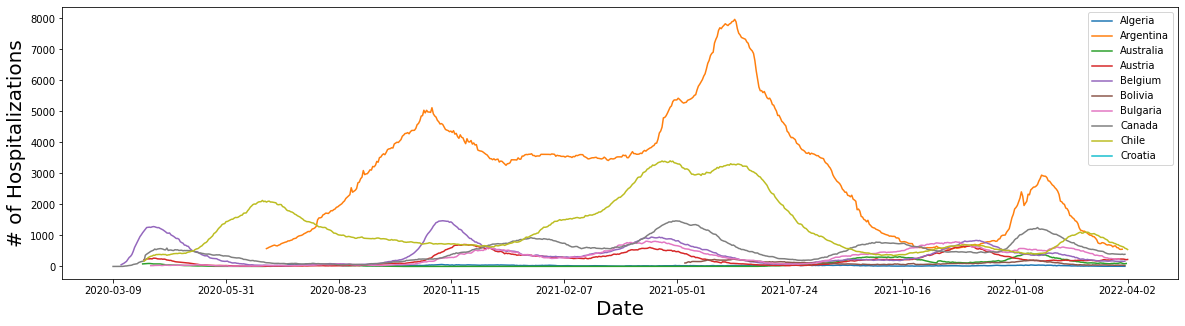

In [6]:
plt.figure(figsize=(20,5))

for ts, values, country in zip(tss, valuess, countries):
    plt.plot(ts, values, label=country)

ticks, labels = get_xticks(tss)
plt.xticks(ticks=ticks, labels=labels)
    
plt.legend()
plt.ylabel('# of Hospitalizations', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.show()

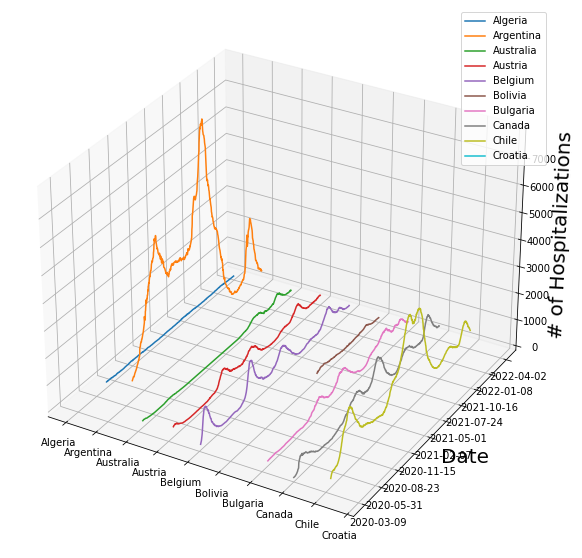

In [7]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(projection='3d')
for i, (ts, values, country) in enumerate(zip(tss, valuess, countries)):
    ii = np.ones_like(ts)*i
    ax.plot(ii, ts, values, label=country)
    
ticks, labels = get_xticks(tss)

ax.set_yticks(ticks=ticks)
ax.set_yticklabels(labels=labels)
ax.set_xticks(ticks=np.arange(len(countries)))
ax.set_xticklabels(labels=countries)
    
plt.legend()
ax.set_zlabel('# of Hospitalizations', fontsize=20)
ax.set_ylabel('Date', fontsize=20)
plt.show()

In [8]:
total_cases = df_owid['total_cases']
new_cases = df_owid['new_cases']
total_deaths = df_owid['total_deaths']



populations = []
idxs = []
countries = df_owid.location.to_numpy()
for i, country in enumerate(countries):
    population = df_pop[df_pop['Country (or dependency)']==country]['Population (2020)']
    if len(population)>0 and total_cases[i]>0 and new_cases[i]>0 and total_deaths[i]>0:
        populations.append(population.item())
        idxs.append(i)
populations = np.array(populations)

total_cases = total_cases[idxs].to_numpy()
new_cases = new_cases[idxs].to_numpy()
total_deaths = total_deaths[idxs].to_numpy()

countries = countries[idxs]

print(len(countries))

155


In [9]:
for country, tc, nc, td in zip(countries, total_cases, new_cases, total_deaths):
    print(f'Country: {country:22s} Total Cases: {tc:8.0f}       New Cases: {nc:6.0f}       Total Deaths: {td:6.0f}')

Country: Afghanistan            Total Cases:   177782       New Cases:     35       Total Deaths:   7670
Country: Albania                Total Cases:   273759       New Cases:     82       Total Deaths:   3492
Country: Algeria                Total Cases:   265679       New Cases:      8       Total Deaths:   6874
Country: Andorra                Total Cases:    40024       New Cases:    311       Total Deaths:    153
Country: Angola                 Total Cases:    99194       New Cases:     25       Total Deaths:   1900
Country: Antigua and Barbuda    Total Cases:     7493       New Cases:      2       Total Deaths:    135
Country: Argentina              Total Cases:  9039838       New Cases:   1927       Total Deaths: 128052
Country: Armenia                Total Cases:   422540       New Cases:     21       Total Deaths:   8616
Country: Aruba                  Total Cases:    34051       New Cases:     85       Total Deaths:    212
Country: Australia              Total Cases:  4628163  

In [10]:
print('COUNTRIES WITH THE MOST CASES\n----------------------------\n\n')
i = total_cases.argsort()[::-1][:10]
for country, tc in zip(countries[i], total_cases[i]):
    print(f'Country: {country:30s} Total Cases: {tc:6.1f}')

COUNTRIES WITH THE MOST CASES
----------------------------


Country: United States                  Total Cases: 80140309.0
Country: India                          Total Cases: 43027035.0
Country: Brazil                         Total Cases: 29978513.0
Country: France                         Total Cases: 25816805.0
Country: Germany                        Total Cases: 21394691.0
Country: United Kingdom                 Total Cases: 21285727.0
Country: Russia                         Total Cases: 17601907.0
Country: Turkey                         Total Cases: 14873927.0
Country: Italy                          Total Cases: 14719394.0
Country: South Korea                    Total Cases: 13639915.0


In [11]:
print('COUNTRIES WITH THE MOST NEW CASES\n----------------------------\n\n')
i = new_cases.argsort()[::-1][:10]
for country, tc in zip(countries[i], new_cases[i]):
    print(f'Country: {country:30s} New Cases: {tc:6.1f}')

COUNTRIES WITH THE MOST NEW CASES
----------------------------


Country: Germany                        New Cases: 565139.0
Country: South Korea                    New Cases: 264097.0
Country: France                         New Cases: 148629.0
Country: Vietnam                        New Cases: 86054.0
Country: Italy                          New Cases: 77040.0
Country: United Kingdom                 New Cases: 69689.0
Country: Australia                      New Cases: 55097.0
Country: Japan                          New Cases: 49141.0
Country: Belgium                        New Cases: 43601.0
Country: Spain                          New Cases: 43265.0


In [12]:
print('COUNTRIES WITH THE MOST TOTAL DEATHS\n----------------------------\n\n')
i = total_deaths.argsort()[::-1][:10]
for country, tc in zip(countries[i], total_deaths[i]):
    print(f'Country: {country:30s} Total Deaths: {tc:6.1f}')

COUNTRIES WITH THE MOST TOTAL DEATHS
----------------------------


Country: United States                  Total Deaths: 982371.0
Country: Brazil                         Total Deaths: 660265.0
Country: India                          Total Deaths: 521264.0
Country: Russia                         Total Deaths: 361679.0
Country: Mexico                         Total Deaths: 323127.0
Country: Peru                           Total Deaths: 212256.0
Country: United Kingdom                 Total Deaths: 165721.0
Country: Italy                          Total Deaths: 159537.0
Country: Indonesia                      Total Deaths: 155164.0
Country: France                         Total Deaths: 142476.0


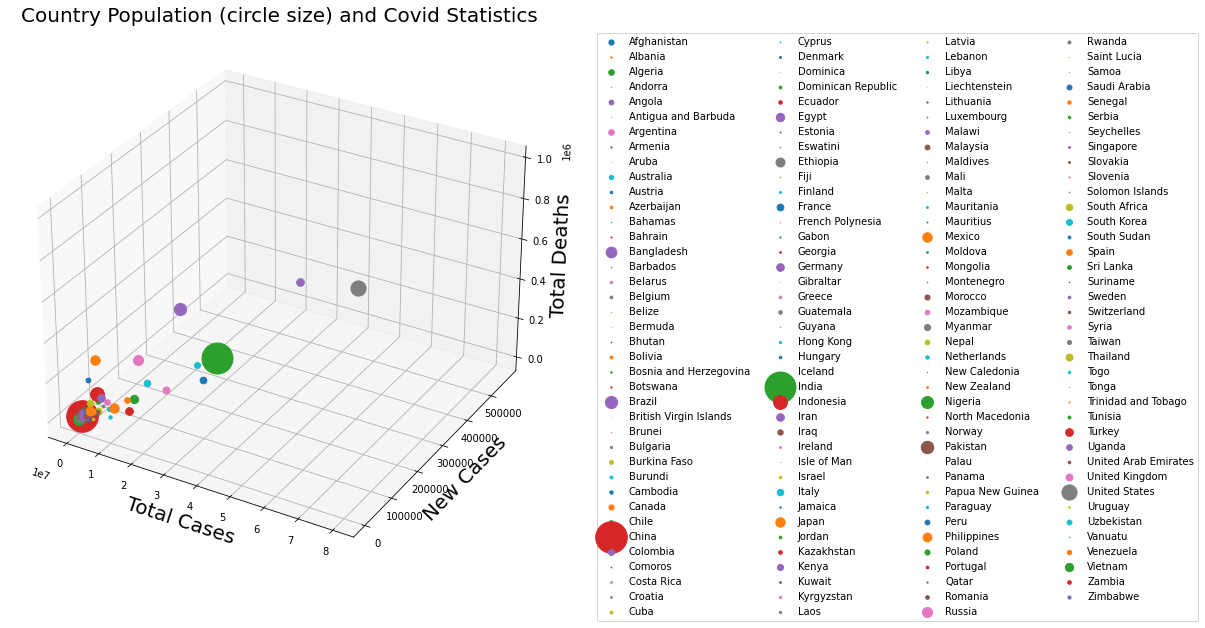

In [13]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

for country, population, tc, nc, td in zip(countries, populations, total_cases, new_cases, total_deaths):
    pop = (population/populations.max()*1000)
    # ax.scatter(xs=total_cases[i], ys=new_cases[i], zs=total_deaths[i], s=pop, label=countries)
    ax.scatter(xs=tc, ys=nc, zs=td, s=pop, label=country)

ax.set_xlabel('Total Cases', fontsize=20)
ax.set_ylabel('New Cases', fontsize=20)
ax.set_zlabel('Total Deaths', fontsize=20)
ax.set_title('Country Population (circle size) and Covid Statistics', fontsize=20)

plt.legend(ncol=4, loc='upper right', bbox_to_anchor=(2.2, 1.0))

plt.show()